# COGS 108 - EDA Checkpoint

# Names

- Arushri Girish
- Ronaldo Garcia-hernandez
- Matthew Bernard
- Daisy Ye
- Jocelyn Quiroz

<a id='research_question'></a>
# Research Question

Was there a significant correlation between the stream time and 1) the number of views and 2) followers which a streamer gained before and during the pandemic?

# Setup

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


# read the dataset from absolute path from local storage
january2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/january2019Data.csv')
february2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/february2019Data.csv')
march2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/march2019Data.csv')
april2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/april2019Data.csv')
may2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/may2019Data.csv')
june2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/june2019Data.csv')
july2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/july2019Data.csv')
august2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/august2019Data.csv')
september2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/september2019Data.csv')
october2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/october2019Data.csv')
november2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/november2019Data.csv')
december2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/december2019Data.csv')
january2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/january2020Data.csv')
february2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/february2020.csv')
march2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/march2020Data.csv')
april2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/april2020Data.csv')
may2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/may2020Data.csv')
june2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/june2020Data.csv')
july2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/july2020Data.csv')
august2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/august2020Data.csv')
september2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/september2020Data.csv')
october2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/october2020Data.csv')
november2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/november2020Data.csv')
december2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/december2020Data.csv')


# creating a list with the above datasets, to create a new dataframe
twitch2019And2020Data = [january2019Data, 
                         february2019Data, 
                         march2019Data, 
                         april2019Data, 
                         may2019Data, 
                         june2019Data, 
                         july2019Data,
                         august2019Data, 
                         september2019Data, 
                         october2019Data, 
                         november2019Data,
                         december2019Data,
                         january2020Data, 
                         february2020Data, 
                         march2020Data, 
                         april2020Data, 
                         may2020Data, 
                         june2020Data, 
                         july2020Data,
                         august2020Data, 
                         september2020Data, 
                         october2020Data, 
                         november2020Data, 
                         december2020Data]

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# drop columns that are non numerical and not necessary for our project
for i in range(len(twitch2019And2020Data)):
    
    twitch2019And2020Data[i] = twitch2019And2020Data[i].loc[:, ~twitch2019And2020Data[i].columns.str.contains('^Unnamed')]
    twitch2019And2020Data[i] = twitch2019And2020Data[i].drop(columns=['Partnered', 'Channel', 'Mature', 'Language', 'Peak viewers'])

In [3]:
# Calculating the percent of followers gained and renaming the column
for i in range(len(twitch2019And2020Data)):
    twitch2019And2020Data[i]['Followers gained'] = twitch2019And2020Data[i]['Followers gained']/twitch2019And2020Data[i]['Followers']*100
    twitch2019And2020Data[i] = twitch2019And2020Data[i].rename(columns={"Followers gained": "Followers gained percent"})

In [4]:
# calculate mean of each dataset and input into new data frame
meanOfTwitchData= []
for i in range(len(twitch2019And2020Data)):
    meanOfTwitchData.append(twitch2019And2020Data[i].mean())           

In [5]:
df = pd.DataFrame(data=meanOfTwitchData)  

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

<AxesSubplot:>

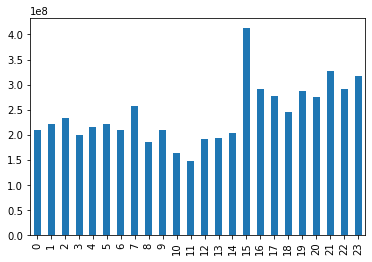

In [6]:
# The barplot describing the watch time over the two years shows a large spike at month 15. 
# Months 0-11 are the consecutive months of 2019. Months 12-23 are the consecutive months of 2020. 
# Month 15 would be April 2020. This is around the time that most countries have a presence of Covid 
# and are in some form of lockdown. During this time, based on our barplot we can say that twitch users 
# were increasingly watching streams. After month 15, we still see a general increase in the watch time.

df['Watch time'].plot(kind='bar')

<AxesSubplot:>

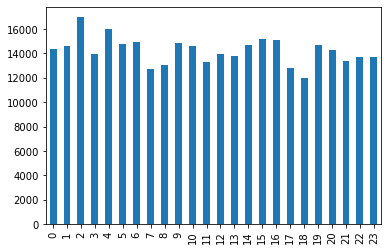

In [18]:
# This barplot shows the stream time from 2019-2020, with hours streamed shown on the y-axis. 
# Overall, there is a slight decrease in stream time as time goes on. Months 2 and 4 have the highest hours 
# of stream time, and months 6, 7, 18 and 19 have a notably lower number of hours streamed. 

df['Stream time'].plot(kind='bar')

<AxesSubplot:>

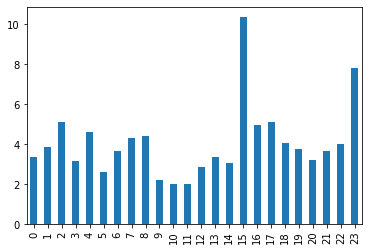

In [10]:
# This barplot depicts the percentage of followers gained on Twitch each month. 
# Months 9-11, at the end of 2019, have the lowest percent of followers gained. 
# Noticeably, month 15 ( April 2020), when lockdown is implemented for many countries, sees 
# a large increase in followers gained–at double the average percentages of the other months. 
# On average, months 15-23, which match the time of lockdown for many countries, see a larger 
# increase in percent of followers gained, than the months preceding them.

df['Followers gained percent'].plot(kind='bar')

<AxesSubplot:>

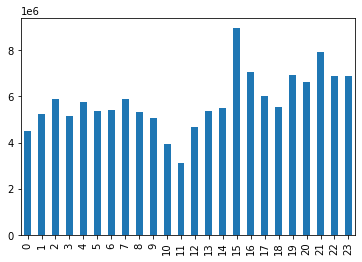

In [12]:
# This barplot shows the number of views gained, in millions, per month over the course of two years. 
# From months 1-9, the number of views gained is fairly stable, at around 5-6 million. 
# There is a dip in the number of views towards the end of 2019 and into 2020 (months 10-12). 
# While month 13 and 14 match the trend of months 1-9, month 15 again sees a spike in Twitch activity, 
# going over 9 million views gained. Afterwards, the average number of views gained is also higher than before 
# month 15.


df['Views gained'].plot(kind='bar')

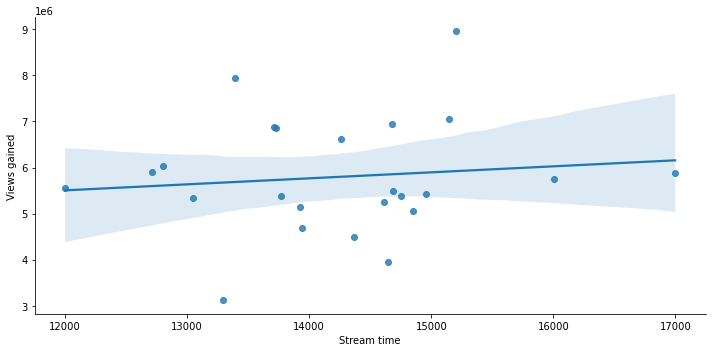

In [13]:
# This graph suggests there is not a strong correlation between views gained and stream time. 
# This is mainly due to the large number of outliers present with no real pattern. 
# For example, a couple outliers suggest a strong positive correlation like the stream times 
# around 15200 while others suggest a negative correlation such as those right under 15000.

sns.lmplot(x="Stream time", y="Views gained", data=df, aspect=2)

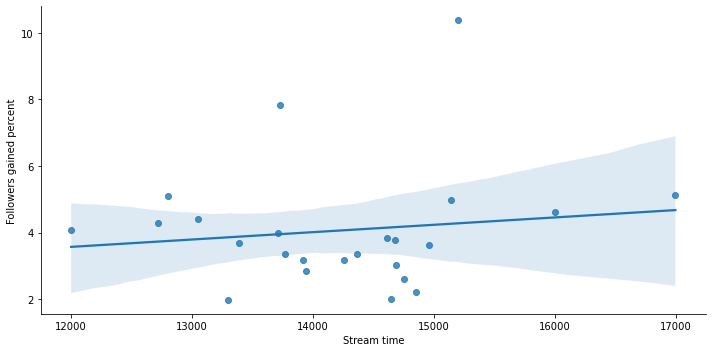

In [14]:
# This graph also shows that there is not a very strong correlation between stream time and percentage 
# of followers gained due to the large number of outliers. Despite the fact that there are a couple 
# outliers suggesting a very strong positive correlation, it can be seen that there are many data 
# points below the linear regression line that suggest that longer stream times do not necessarily 
# imply more followers gained.

sns.lmplot(x="Stream time", y="Followers gained percent", data=df, aspect=2)

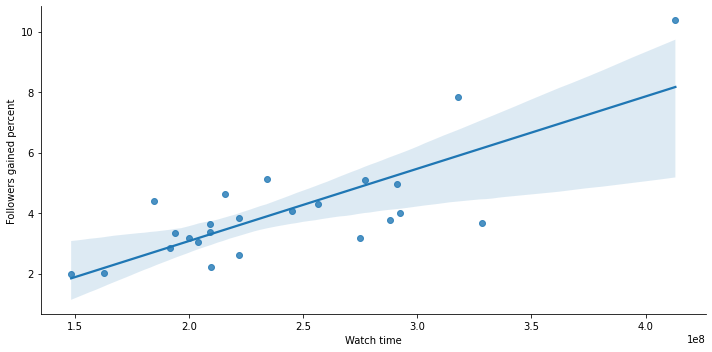

In [15]:
# The graph below shows the correlation between watch time and followers gained. 
# We observe a strong positive correlation. This means that with an increasing watch time over the two years, 
# the followers a streamer gained also increased.

sns.lmplot(x="Watch time", y="Followers gained percent", data=df, aspect=2)

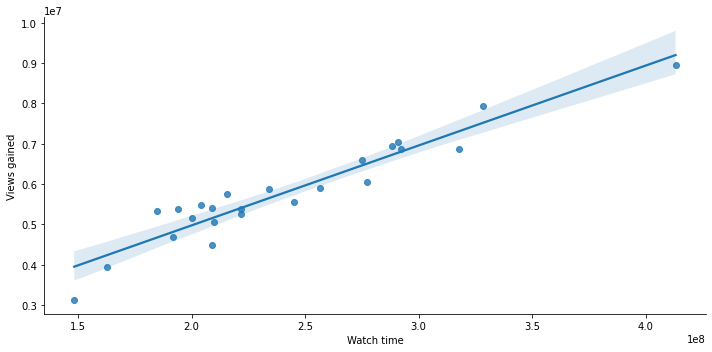

In [16]:
# This graph shows the correlation between watch time and viewers gained. It shows a very strong correlation.
# Many of the data points can be found very closely to our line in this plot. There is a positive relationship 
# between the two variables, which means that as watch time increases, viewers gained also increases. 

sns.lmplot(x="Watch time", y="Views gained", data=df, aspect=2)

<AxesSubplot:>

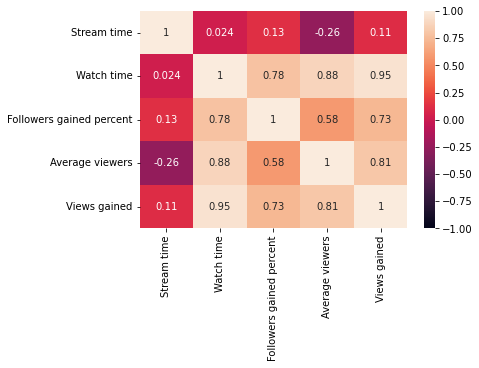

In [17]:
# After creating lmplots, we decided to create a Heatmap comparing all five variables to understand the correlation 
# between each. Similar to what we noticed in our lmplots, Watch time shows a strong positive correlation with 
# the percent of Followers gained, Average Viewers and Views Gained. This means that there is an increase in the 
# number of new interactions by twitch users with top streamers over the course of the two years (2019 and 2020). 
# Stream time shows weak correlations with the other variables, meaning that the hours streamed by top streamers 
# over the two years had no correlation with the user interactions.

sns.heatmap(df.loc[:, ['Stream time', 'Watch time', 'Followers gained percent', 'Average viewers', 'Views gained']].corr(), annot=True, vmin=-1, vmax=1)